## Final Project

In [325]:
import pandas as pd
import numpy as np



dataset_url = "https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv"

df = pd.read_csv(dataset_url)
df.tail()


year  month  day gender  births
15542  2008     10  NaN      M  183219
15543  2008     11  NaN      F  158939
15544  2008     11  NaN      M  165468
15545  2008     12  NaN      F  173215
15546  2008     12  NaN      M  181235

In [333]:
# keeping birthdates that are are from 1960 and 1980
df = df[(df['year'] >= 1960) & (df['year']<= 1990)]
df.tail()

year  month  day gender  births day_month_str
15062  1988     12   29      M    5944         29/12
15063  1988     12   30      F    5742         30/12
15064  1988     12   30      M    6095         30/12
15065  1988     12   31      F    4435         31/12
15066  1988     12   31      M    4698         31/12

In [340]:
# dropping out columns that have one or more null elements
df = df.dropna()

# droping out days that are above 31 (some of the data has a day of value 99)
df = df[df["day"] < 31]

# took out ambiguous years (leap years) to avoid date parsing errors
df = df.drop(df[(df["month"] == 2) & (df["day"] >= 29)].index)

#convert days to int
df["day"] = df["day"].astype(int)
df.tail()


year  month  day gender  births day_month_str
15060  1988     12   28      M    5989         28/12
15061  1988     12   29      F    5760         29/12
15062  1988     12   29      M    5944         29/12
15063  1988     12   30      F    5742         30/12
15064  1988     12   30      M    6095         30/12

In [341]:
# adding a column for Day/Month
df["day_month_str"] = df["day"].astype(str) + "/"+ df["month"].astype(str)
df.head()

year  month  day gender  births day_month_str
0  1969      1    1      F    4046           1/1
1  1969      1    1      M    4440           1/1
2  1969      1    2      F    4454           2/1
3  1969      1    2      M    4548           2/1
4  1969      1    3      F    4548           3/1

In [343]:
from datetime import datetime

def convert_str_to_datetime(day_month_str):
    return datetime.strptime(day_month_str, "%d/%m")


df["day_month_str"] = df["day_month_str"].apply(convert_str_to_datetime)


TypeError: strptime() argument 1 must be str, not Timestamp

In [346]:
df.tail()

year  month  day gender  births day_month_str
15060  1988     12   28      M    5989    1900-12-28
15061  1988     12   29      F    5760    1900-12-29
15062  1988     12   29      M    5944    1900-12-29
15063  1988     12   30      F    5742    1900-12-30
15064  1988     12   30      M    6095    1900-12-30

In [349]:
## split the dataset into the 3 decades (1960 and 1980)

#from 1960 to 1970 (no dates before 1980 because filtered previously)
gen_1 = df[df["year"] < 1970]

#from 1970 to 1980
gen_2 = df[(df["year"] >= 1970) & (df["year"] < 1980)]


#from 1980 to 1990 (no dates after 1990 because filtered previously)
gen_3 = df[df["year"] >= 1980]


## total births per generation
total_births_per_gen = pd.DataFrame({"generation": ["gen_1", "gen_2", "gen_3"],
                                    "total births": [gen_1["births"].sum(),gen_2["births"].sum(),gen_3["births"].sum()]
                                    })

total_births_per_gen


generation  total births
0      gen_1       3259522
1      gen_2      30184598
2      gen_3      30337423

In [350]:
# sum per day and month of births per generation
gen_1_birth_sum = gen_1.groupby(["day_month_str"]).agg({'births': [np.sum]})
gen_2_birth_sum = gen_2.groupby(["day_month_str"]).agg({'births': [np.sum]})
gen_3_birth_sum = gen_3.groupby(["day_month_str"]).agg({'births': [np.sum]})


gen_1_birth_sum.tail()

births
                 sum
day_month_str       
1900-12-26      9910
1900-12-27      9304
1900-12-28      9004
1900-12-29     10980
1900-12-30     12232

In [351]:
gen_1_birth_sum["births"]["sum"]

day_month_str
1900-01-01     8486
1900-01-02     9002
1900-01-03     9542
1900-01-04     8960
1900-01-05     8390
1900-01-06     9560
1900-01-07     9738
1900-01-08     9734
1900-01-09     9434
1900-01-10    10042
1900-01-11     9178
1900-01-12     8450
1900-01-13     9834
1900-01-14    10366
1900-01-15     9894
1900-01-16     9662
1900-01-17     9974
1900-01-18     9312
1900-01-19     8622
1900-01-20     9808
1900-01-21    10474
1900-01-22     9884
1900-01-23     9454
1900-01-24     9798
1900-01-25     9022
1900-01-26     8568
1900-01-27     9910
1900-01-28    10032
1900-01-29     9380
1900-01-30     9674
              ...  
1900-12-01    10648
1900-12-02    10736
1900-12-03    10300
1900-12-04    10254
1900-12-05    10428
1900-12-06     9420
1900-12-07     8740
1900-12-08    10646
1900-12-09    10730
1900-12-10    10348
1900-12-11    10300
1900-12-12    10758
1900-12-13     9602
1900-12-14     8762
1900-12-15    10898
1900-12-16    11022
1900-12-17    10646
1900-12-18    10426
1900-1

[]

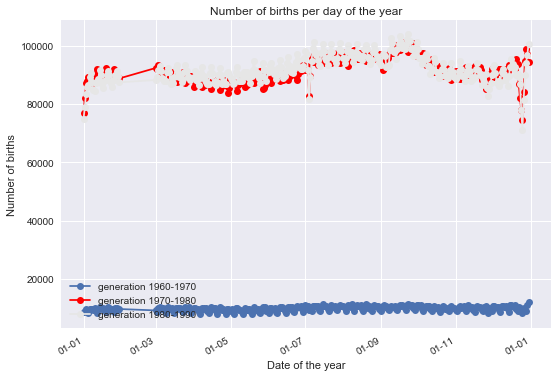

In [355]:
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from matplotlib import dates as mpl_dates

plt.rcParams.update({'font.size':15})
plt.style.use('seaborn')
fig = plt.figure()

plt.title('Number of births per day of the year')
plt.xlabel('Date of the year')
plt.ylabel("Number of births")

plt.gcf().autofmt_xdate()
plt.plot_date(gen_1_birth_sum.index,gen_1_birth_sum["births"]["sum"],linestyle='solid', label="generation 1960-1970")

plt.plot_date(gen_2_birth_sum.index,gen_2_birth_sum["births"]["sum"],linestyle='solid', color='#FF0000', label="generation 1970-1980")

plt.plot_date(gen_3_birth_sum.index,gen_3_birth_sum["births"]["sum"],linestyle='solid', color='#E6E6E6', label="generation 1980-1990")



date_format = mpl_dates.DateFormatter('%d-%m')
plt.legend(loc='lower left')
plt.gca().xaxis.set_major_formatter(date_format)
plt.tight_layout()
plt.plot()

births
                 sum
day_month_str       
1900-02-24     91690
1900-02-25     90836
1900-02-26     90991
1900-02-27     89388
1900-02-28     90941